In [24]:
# Zadanie 1

# Po wybraniu zbioru danych przetestować różne algorytmy do wykrywania communities.
# W sprawozdaniu:
# - opisać zbiór danych (liczba wierzchołków, liczba krawędzi, co reprezentuje),
# - którko opisać wybrane algorytmy do wykrywania communities,
# - załączyć wyniki: wizualizacje communities, dodatkowo liczbę znalezionych communities i ich liczność.
# - odpowiedzieć na pytania: Czy resultaty się od siebie różnią? Co może być tego powodem?

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

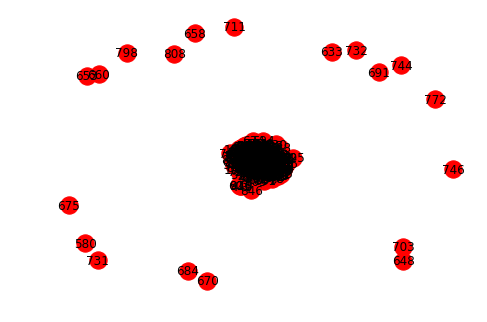

In [31]:
# Wczytywanie grafu z pliku

G = nx.Graph()
edges = nx.read_edgelist('dataset/email-Eu-core/email-Eu-core.txt')
G.add_edges_from(edges.edges())
nx.draw(G, with_labels=True)

In [32]:
from networkx.algorithms.community.centrality import girvan_newman
communities_iter = girvan_newman(G)

communities_sum = 0
communities_gn = []

for community_gn in next(communities_iter):
    communities_sum += 1
    communities_gn.append(community_gn)
    print("Community ", communities_sum)
    print(community_gn)
    print("Liczność community: ", len(community_gn), "\n")
    
print("Znaleziono communities: ", communities_sum)

Community  1
{'230', '235', '589', '788', '834', '426', '925', '442', '549', '831', '109', '810', '947', '610', '293', '312', '173', '619', '172', '654', '628', '431', '446', '386', '118', '615', '556', '991', '795', '454', '95', '866', '985', '664', '909', '928', '91', '387', '579', '184', '902', '335', '799', '425', '946', '645', '822', '827', '933', '656', '740', '177', '475', '380', '20', '814', '127', '811', '531', '277', '755', '203', '546', '222', '471', '326', '965', '1002', '528', '56', '955', '205', '548', '719', '175', '783', '826', '942', '689', '301', '667', '248', '502', '642', '891', '738', '674', '47', '2', '262', '725', '669', '334', '672', '218', '455', '402', '226', '880', '511', '724', '967', '87', '237', '111', '490', '518', '13', '498', '128', '295', '577', '354', '817', '801', '32', '736', '496', '438', '626', '630', '883', '878', '968', '202', '392', '98', '324', '43', '564', '513', '512', '356', '1004', '261', '961', '229', '787', '110', '325', '1000', '137', '

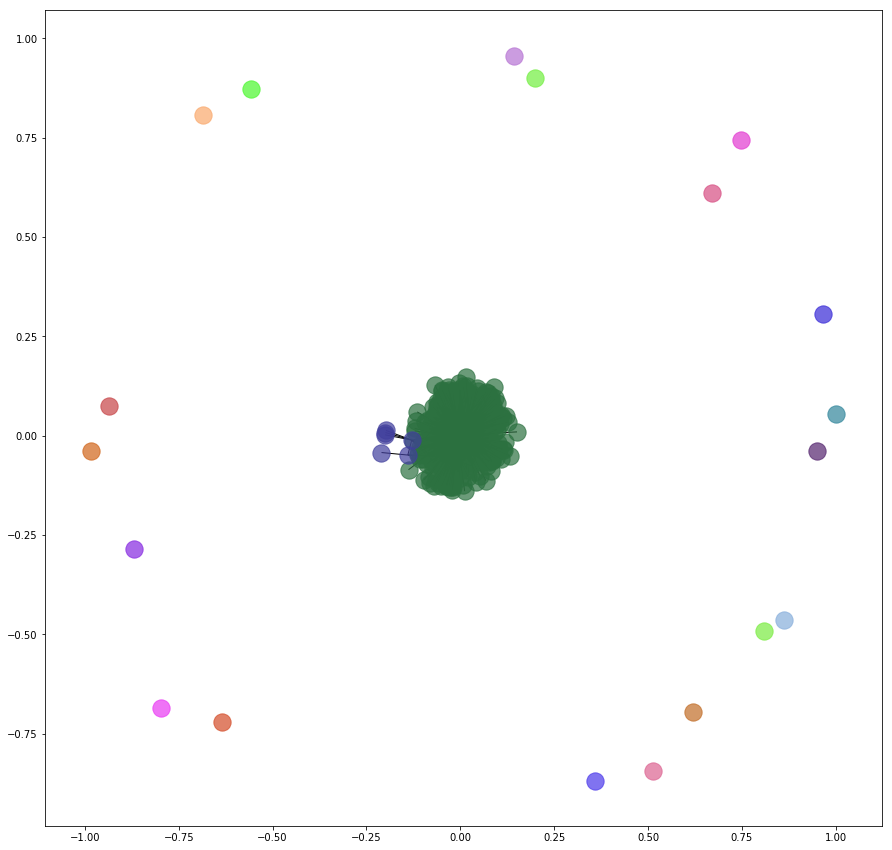

In [33]:
from matplotlib.pyplot import figure
import numpy

figure(figsize=(15,15))
pos = nx.spring_layout(G)
for community in list(communities_gn):
    nx.draw_networkx_nodes(G, pos=pos,
                           nodelist=community,
                           node_color=numpy.random.rand(3,),
                           alpha=0.7)
nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges)

plt.show()

In [34]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
communities_gmc = greedy_modularity_communities(G)

communities_sum = 0

for community_gmc in communities_gmc:
    communities_sum += 1
    print("Community ", communities_sum)
    print(community_gmc)
    print("Liczność community: ", len(community_gmc), "\n")
    
print("Znaleziono communities: ", communities_sum)

Community  1
frozenset({'230', '235', '589', '834', '549', '831', '109', '810', '610', '173', '619', '654', '431', '118', '615', '991', '454', '866', '928', '91', '184', '799', '946', '475', '20', '811', '531', '755', '546', '471', '326', '56', '175', '783', '826', '667', '642', '738', '2', '669', '880', '111', '237', '87', '490', '518', '577', '736', '626', '630', '968', '564', '1004', '513', '512', '356', '787', '110', '325', '137', '3', '641', '478', '832', '894', '713', '286', '244', '855', '138', '68', '807', '982', '652', '108', '319', '774', '863', '427', '306', '400', '462', '83', '240', '114', '571', '990', '889', '249', '780', '70', '612', '885', '460', '154', '432', '886', '1003', '639', '31', '858', '327', '424', '239', '282', '1001', '888', '4', '210', '217', '279', '710', '901', '803', '281', '533', '355', '305', '973', '271', '375', '131', '298', '71', '258', '792', '538', '170', '472', '288', '578', '899', '646', '147', '195', '42', '22', '153', '211', '550', '524', '10

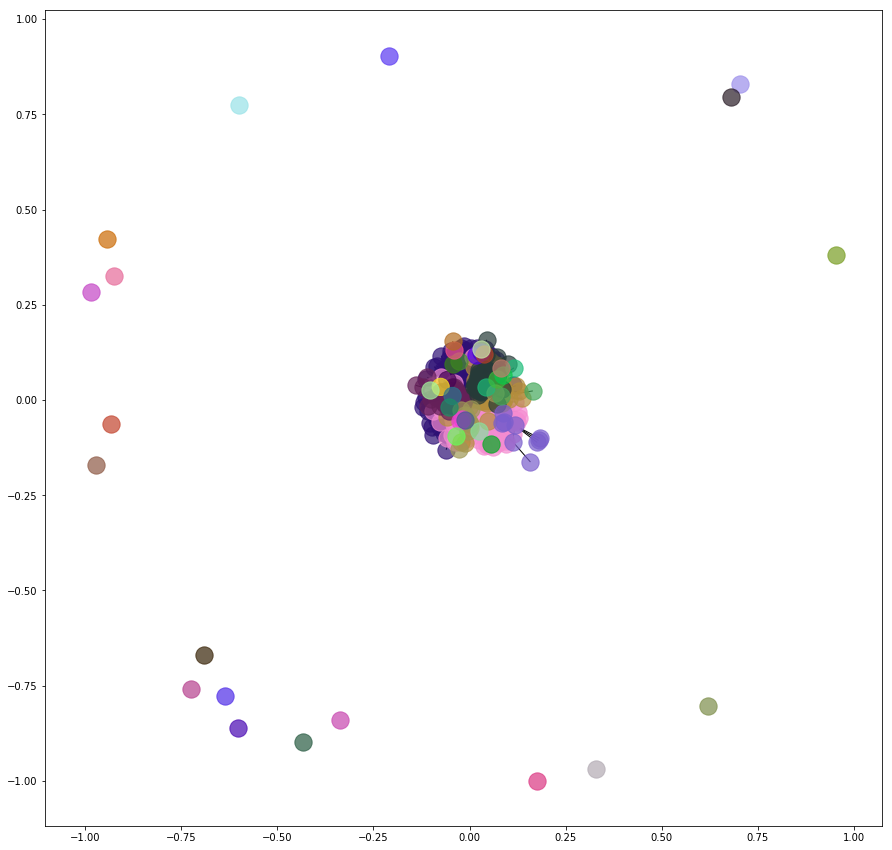

In [35]:
figure(figsize=(15,15))
pos = nx.spring_layout(G)
for community in communities_gmc:
    nx.draw_networkx_nodes(G, pos=pos,
                           nodelist=community,
                           node_color=numpy.random.rand(3,),
                           alpha=0.7)
nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges)

plt.show()